In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf 
import datetime  

In [36]:
start = '2012-01-01'
end = datetime.datetime.now().strftime('%Y-%m-%d')
stock = 'AAPL'
# Get the data
data = yf.download(stock, start=start, end=end)

[*********************100%%**********************]  1 of 1 completed


In [37]:
data.reset_index(inplace=True)
data

,Date,Open,High,Low,Close,Adj Close,Volume
0,2012-01-03,14.621429,14.732143,14.607143,14.686786,12.433826,302220800
1,2012-01-04,14.642857,14.810000,14.617143,14.765714,12.500648,260022000
2,2012-01-05,14.819643,14.948214,14.738214,14.929643,12.639424,271269600
3,2012-01-06,14.991786,15.098214,14.972143,15.085714,12.771560,318292800
4,2012-01-09,15.196429,15.276786,15.048214,15.061786,12.751300,394024400
...,...,...,...,...,...,...,...
3084,2024-04-08,169.029999,169.199997,168.240005,168.449997,168.449997,37425500
3085,2024-04-09,168.699997,170.080002,168.350006,169.669998,169.669998,42451200
3086,2024-04-10,168.800003,169.089996,167.110001,167.779999,167.779999,49709300
3087,2024-04-11,168.339996,175.460007,168.160004,175.039993,175.039993,91070300


In [38]:
ma_100_days = data['Close'].rolling(100).mean()


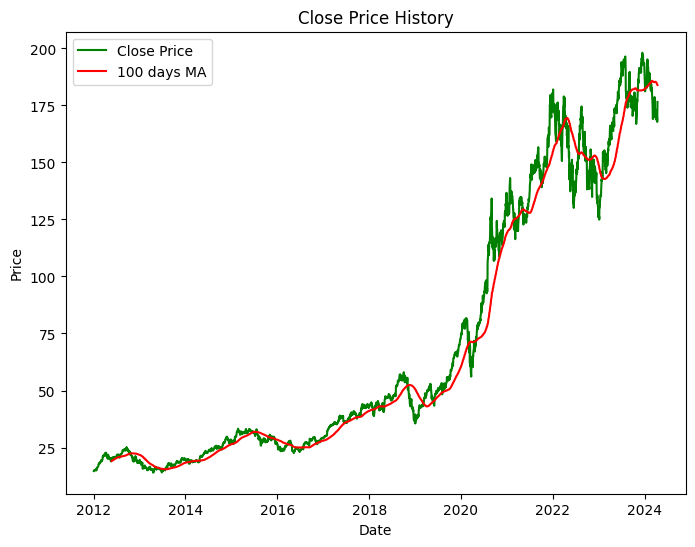

In [39]:
plt.figure(figsize=(8,6))
plt.plot(data['Date'], data['Close'], label='Close Price', color='g')
plt.plot(data['Date'], ma_100_days, label='100 days MA', color='r')
plt.title('Close Price History')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend(loc='upper left')


In [40]:
ma_200_days = data['Close'].rolling(200).mean()

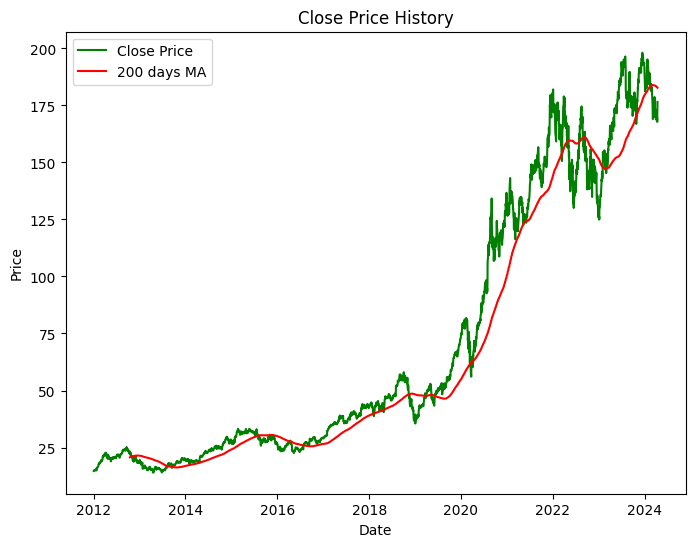

In [41]:
plt.figure(figsize=(8,6))
plt.plot(data['Date'], data['Close'], label='Close Price', color='g')
plt.plot(data['Date'], ma_200_days, label='200 days MA', color='r')
plt.title('Close Price History')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend(loc='upper left')


In [42]:
data.dropna(inplace=True)

## Training...  ##

In [43]:
data_train = pd.DataFrame(data.Close[0:int(len(data)*0.80)])
data_test = pd.DataFrame(data.Close[int(len(data)*0.80):len(data)]) 

In [44]:
data_train.shape[0], data_test.shape[0]

(2471, 618)

In [45]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [46]:
data_train_scale = scaler.fit_transform(data_train)

In [47]:
x_train = []
y_train = []
for i in range(100, data_train_scale.shape[0]):
    x_train.append(data_train_scale[i-100:i])
    y_train.append(data_train_scale[i,0])

In [48]:
x_train, y_train = np.array(x_train), np.array(y_train)

In [49]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout
from keras import backend


In [50]:
model = Sequential()
model.add(LSTM(units=50, activation='relu', return_sequences=True, input_shape=((x_train.shape[1],1))))
model.add(Dropout(0.2))

model.add(LSTM(units=60, activation='relu', return_sequences=True))
model.add(Dropout(0.3))

model.add(LSTM(units=80, activation='relu', return_sequences=True))
model.add(Dropout(0.4))

model.add(LSTM(units=120, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=1))

C:\Users\Jorge Esteban\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
